<a href="https://colab.research.google.com/github/JuanSosa01/JuanSosa01/blob/main/datarius.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<html>
<head>
    <style>
        .center-image {
            display: block;
            margin: 0 auto;
        }
    </style>
</head>
<body>
    <img src="https://th.bing.com/th/id/OIP.Nr0R8mkDrCoGYljdy0tTrgHaEK?pid=ImgDet&w=474&h=266&rs=1" alt="Nombre del Logo" class="center-image">
</body>
</html>



#  **Limpieza de Datos**
En este notebook, se llevará a cabo un proceso de limpieza de datos utilizando información obtenida a partir del informe de tareas descargado del sitio web https://ar.gutrade.io/Mondelezar/Private/Dashboard. Los datos han sido recopilados en el período comprendido entre el 28 de agosto de 2023 y el 06 de octubre de 2023. El objetivo principal de esta iniciativa es mejorar el seguimiento del censo, ya que hasta el momento se ha limitado a realizar un monitoreo sin la generación de resultados en tiempo real que sean aprovechables de inmediato. Para abordar esta cuestión, se ha llevado a cabo una exhaustiva limpieza de los datos con el propósito de estructurar nuestros conjuntos de datos de tal manera que puedan ser integrados eficazmente en Power BI. Esto permitirá la creación de paneles de control que facilitarán el análisis de datos y la identificación de patrones relevantes en nuestra información.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

## **PRIMERO CARGAMOS LOS DATOS.**

In [ ]:
df = pd.read_excel('Reportes de tareas completadas.xlsx')


Cargamos los df de los locales cerrados y de los censistas.

In [ ]:
df_cerrados = pd.read_excel('base_cerrados.xlsx')
df_censistas = pd.read_excel('Censista.xlsx')

In [ ]:
df_cerrados = df_censistas.merge(df_cerrados, on="Nombre de persona de interés", how="inner")
df_cerrados = df_cerrados.drop(['Provincia_y', 'Localidad_y', 'Departamentos'], axis=1)


In [ ]:
cer = df_cerrados.columns.tolist()
print(cer)

['ID_censista', 'Nombre de persona de interés', 'Provincia_x', 'Localidad_x', 'ID_Alta', 'Nombre_local', 'Dirección', 'Coordenadas', 'Departamento', 'Canal', 'Fecha', 'Hora', 'Descripción']


In [ ]:
# Lista de nombres de columnas a eliminar
columnas_a_eliminar = ["Nombre contacto en punto de interés", "Teléfono contacto en punto de interés", "Preguntas"]

# Eliminar las columnas especificadas
df = df.drop(columnas_a_eliminar, axis=1)

# Eliminar la primera fila
df = df.iloc[1:]

df = df.dropna(subset=['Provincia'])

df.dropna(subset=['Provincia', 'Departamentos', 'Localidad'], inplace=True)

In [ ]:
columnas = df.columns.to_list()
print(columnas)

['Fecha de inicio', 'Hora inicio', 'Coordenadas inicio', 'Fecha completado', 'Hora completado', 'Coordenadas fin', 'Identificador de persona de interés', 'Nombre de persona de interés', 'Identificador del punto de interés', 'Nombre del punto de interés', 'Departamento del punto de interés', 'Dirección del punto de interés', 'Provincia', 'Departamentos', 'Localidad', 'Tipo de Punto de Venta', 'Razón Social', 'CUIT', 'Papeles?', 'Canal', 'Cantidad de Cajas', 'Cantidad de Góndolas', 'Tiene Verdulería', 'Tiene Fiambrería', 'Heladeras con lacteos', 'Heladeras con bebidas', 'Oreo', 'Cadbury', 'Milka', 'Toblerone', 'Halls', 'Tang', 'Club Social', 'Royal', 'Clight', 'Terrabusi', 'Variedad', 'Beldent', 'Bubaloo', 'Criollitas', 'Diversion', 'Flics', 'Formis', 'Cofler', 'Hogareñas', 'Kesitas', 'La campagnola', 'Macucas', 'Maná', 'Mellizas', 'Menthoplus', 'Merengadas', 'Mogul', 'Mister Pops', 'Natural Break', 'Nereida', 'Opera', 'Poncho Negro', 'Porteñitas', 'Seven', 'Topline', 'Toddy', 'Flynpaff'

## **COMENZANDO LA LIMPIEZA**

Hemos identificado una variabilidad en la forma en que los censistas ingresan los valores en la columna de "Localidad". En ocasiones, se emplean diversas representaciones para expresar el mismo valor. Este fenómeno se traduce en la existencia de múltiples formas de escritura para un mismo concepto o entidad. Con el objetivo de estandarizar y consolidar la información, llevaremos a cabo un proceso de unificación de estos valores.

In [ ]:
# Convierte todos los valores de 'Localidad' a minúsculas
df['Localidad'] = df['Localidad'].str.lower()

# Diccionario de reemplazos para valores estandarizados
reemplazos = {
    "billinghurst 52": "billinghurst",
    "junín": "junin",
    "san nicolas": "san nicolas",
    "santa fe": "santa fe",
    "san fernando del valle de cat.": "capital",
    "san fernando del valle": "capital",
    "río cuarto": "rio cuarto",
    "catamarca": "capital",
    "la rioja": "capital",
    "córdoba": "carlos paz",
    "villa mari": "villa maria",
    "rivadavia\r\n": "rivadavia",
    "santiago del esteo": "santiago del estero",
    "saan pedro": "san pedro",
    "ssn pedro": "san pedro",
    "santoago del estero": "santiago del estero",
    "san juan": "san juan",
    "capital": "capital",
    "josé león suárez": "josé león suárez",
    "jose león suárez": "josé león suárez",
    "jose leon suárez": "josé león suárez",
    "san lorenzo": "san lorenzo",
    "colon": "colon",
    "villa ballester": "villa ballester",
    "moreno": "moreno",
    "campana": "campana",
    "zarate": "zarate",
    "la rioja ": "la rioja",
    "chajari": "chajarí",
    "villa adelina": "villa adelina",
    "cipolletti": "cipolletti",
    "plottier": "plottier",
    "munro": "munro",
    "merlo": "merlo",
    "san andrés": "san andrés",
    "chacabuco": "chacabuco",
    "villa maipú": "villa maipú",
    "concordia": "concordia",
    "santa fe": "santa fe",
    "villa martelli": "villa martelli",
    "rosario": "rosario",
    "san nicolas": "san nicolas",
    "vikla martelli": "villa martelli",
    "florida": "florida",
    "loma hermosa": "loma hermosa",
    "san antonio de padua": "san antonio de padua",
    "mwrlo": "merlo",
    "rivadavia": "rivadavia",
    "padua": "padua",
    "santiago del estero": "santiago del estero",
    "roaario": "rosario",
    "loma hermosa ": "loma hermosa",
    "guaoeguaychu": "gualeguaychu",
    "posadas": "posadas",
    "rivadavia\n": "rivadavia",
    "ssn nicolas": "san nicolas",
    "merlo ": "merlo",
    "gualguaychu": "gualeguaychu",
    "chacabuco ": "chacabuco",
    "entre rios": "entre rios",
    "misiones": "misiones",
    "posadas ": "posadas",
    "gualeguychu": "gualeguaychu",
    "santiago del estero ": "santiago del estero",
    "gualeguyachu": "gualeguaychu",
    "junín ": "junin",
    "junin": "junin",
    "san nicolad": "san nicolas",
    "josé león suárez ": "josé león suárez",
    "jose león suárez ": "josé león suárez",
    "libertad": "libertad",
    "libertad ": "libertad",
    "rivadavia ": "rivadavia",
    "lib2": "libertad",
    "villa ballester ": "villa ballester",
    "santiago del esteri": "santiago del estero",
    "gualeguaychu . p belgrano": "gualeguaychu",
    "libertaf": "libertad",
    "billinghurst ": "billinghurst",
    "possdas": "posadas",
    "san fernando del valle ": "capital",
    "ricadavia": "rivadavia",
    "carlos paz": "carlos paz",
    "córdoba ": "carlos paz",
    "san nicolas ": "san nicolas",
    "carlos paz ": "carlos paz",
    "villa maria": "villa maria",
    "rio cuarto ": "rio cuarto",
    "río cuarto": "rio cuarto",
    "san pedro": "san pedro",
    "capital ": "capital",
    "santoago del estero ": "santiago del estero",
    "boulogne ": "boulogne",
    "cors": "corrientes",
    "samtiago del estero": "santiago del estero",
    "rawson": "rawson",
    "rawson ": "rawson",
    "munro":"merlo",
    "rio cuarto":"rio cuarto",
    'pontevedra ':'pontevedra',
    'santiagi del estero':'santiago del estero',
    'csrlos paz':'carlos paz',
    'rawson\n':"rawson",
    'pontevedra 185':'pontevedra',
    'río cuarto ':'rio cuarto',
    'río cuarto ':'rio cuarto',
    'santa fw':'santa fe',
    'villa lynch ':'villa lynch',
    'junin ':'junin'
}

# Aplicar el mapeo a la columna 'Localidad'
df['Localidad'] = df['Localidad'].replace(reemplazos)

# Verificar los valores únicos después del mapeo
valores_unicos = df['Localidad'].unique()
print(valores_unicos)


['san juan' 'capital' nan 'san fernando del valle de catamarca'
 'josé león suárez' 'gualeguaychu' 'san lorenzo' 'colon' 'villa ballester'
 'moreno' 'campana' 'zarate' 'la rioja' 'chajarí' 'villa adelina'
 'cipolletti' 'plottier' 'merlo' 'san andrés' 'chacabuco' 'villa maipú'
 'concordia' 'santa fe' 'villa martelli' 'rosario' 'san nicolas' 'florida'
 'billinghurst' 'loma hermosa' 'san antonio de padua' 'rivadavia' 'padua'
 'santiago del estero' 'posadas' 'entre rios' 'misiones' 'junin'
 'libertad' 'carlos paz' 'villa maria' 'rio cuarto' 'san pedro' 'boulogne'
 'corrientes' 'rawson' 'soler' 'soler ' 'pontevedra' 'ponte vedra '
 'san martin ' 'san martín ' 'villa lynch' 'capital\n' 'posadas\n'
 'san fernando del valle de cat' 'san fernando del valle de' 'rivadia '
 'rovadavia ' 'mariano acosta' 'mariano acosta ' 'cordoba '
 'mariano moreno' 'villa maipú ' 'san andrés ' 'carlos paz  '
 'general roca' 'mariano moereno' 'mariano moreno ' 'general roca '
 '\nsanta fe' 'general viamonte ' 'sa

## **CAMBIAMOS LOS NOMBRES DE LAS COLUMNAS PARA PODER IDENTIFICAR LAS PREGUNTAS POR CANAL.**

La base de datos descargada presenta una amalgamación de todas las preguntas sin una especificación clara sobre a qué canal pertenece cada columna. Con el propósito de mejorar la identificación de las preguntas relacionadas con cada canal, hemos empleado una referencia contenida en una hoja de Excel denominada "Preguntas por Canal". Aunque dicha referencia no proporcionaba una explicación detallada de las columnas, permitía identificar el orden de las mismas. De esta manera, se determinó que las primeras preguntas en la base de datos, de izquierda a derecha, corresponden al canal "Autoservicio", y así sucesivamente para los demás canales. Utilizando esta información, se procedió a renombrar todas las columnas para reflejar de manera más clara a qué canal se asocia cada pregunta.


In [ ]:
nuevos_nombres = {'Cantidad de Cajas': 'Cantidad de Cajas(Autoservicio)',
                  'Cantidad de Góndolas': 'Cantidad de Góndolas(Autoservicio)',
                  'Tiene Verdulería': 'Tiene Verdulería(Autoservicio)',
                  'Tiene Fiambrería': 'Tiene Fiambrería(Autoservicio)',
                  'Heladeras con lacteos': 'Heladeras con lacteos(Autoservicio)',
                  'Heladeras con bebidas': 'Heladeras con bebidas(Autoservicio)',
                  'Cantidad de Exhibidores de primeras marcas (Lays/Gaseosas/Cervezas)': 'Cantidad de Exhibidores de primeras marcas (Lays/Gaseosas/Cervezas)(Almacen)',
                  'Tiene surtido de vinos': 'Tiene surtido de vinos(Almacen)',
                  'Tiene Heladera de lácteos': 'Tiene Heladera de lácteos(Almacen)',
                  'Tiene gondola': 'Tiene gondola(Maxi Kiosco)',
                  'En caso de que si tenga gondola, cuan llena esta?': 'En caso de que si tenga gondola, cuan llena esta?(Maxi Kiosco)',
                  'Tiene exhibidor de chicles/caramelos': 'Tiene exhibidor de chicles/caramelos(Maxi Kiosco)',
                  'En caso de tener exhibidor de chicles/caramelos, cuan lleno esta?': 'En caso de tener exhibidor de chicles/caramelos, cuan lleno esta?(Maxi Kiosco)',
                  'No tiene servicios adicionales': 'No tiene servicios adicionales(Maxi Kiosco)',
                  'Fotocopias': 'Fotocopias(Maxi Kiosco)',
                  'RapiPago': 'RapiPago(Maxi Kiosco)',
                  'Tramites': 'Tramites(Maxi Kiosco)',
                  'SUBE': 'SUBE(Maxi Kiosco)',
                 'Cuan llena estan las estanterias': 'Cuan llena estan las estanterias(Kiosco Ventana)',
                 'Comercializa chocolates': 'Comercializa chocolates(Vinoteca)',
                  'Comercializa productos de kiosco': 'Comercializa productos de kiosco(farmacia)',
                  'Modalidad de Venta': 'Modalidad de Venta(Goloteca/Golsineria)',
                  'Tabletas': 'Tabletas(Goloteca/Golsineria)',
                  'Bombones': 'Bombones(Goloteca/Golsineria)',
                  'Alfajores': 'Alfajores(Goloteca/Golsineria)',
                  'Chicles': 'Chicles(Goloteca/Golsineria)',
                  'Caramelos': 'Caramelos(Goloteca/Golsineria)',
                  'Galletas': 'Galletas(Goloteca/Golsineria)',
                  'Cantidad de góndolas/estanterías': 'Cantidad de góndolas/estanterías(Dietetica)',
                 'BC': 'BC(Dietetica)',
                  'Aguila': 'Aguila(Dietetica)',
                  'CerealMix': 'CerealMix(Dietetica)',
                  'Turrón Arcor': 'Turrón Arcor(Dietetica)',
                  'Chocolate sin Azúcar Georgalos': 'Chocolate sin Azúcar Georgalos(Dietetica)',
                  'Llenado de estanterías': 'Llenado de estanterías(Dietetica)',
                  'Georgalos': 'Georgalos(Dietetica)',
                  'Cigarros': 'Cigarros(Dietetica)',
                  'Identificador de persona de interés': 'ID_censista'
                  }
df = df.rename(columns=nuevos_nombres)

In [ ]:
columnas = df.columns .tolist()
print(columnas)

['Fecha de inicio', 'Hora inicio', 'Coordenadas inicio', 'Fecha completado', 'Hora completado', 'Coordenadas fin', 'Identificador de persona de interés', 'Nombre de persona de interés', 'Identificador del punto de interés', 'Nombre del punto de interés', 'Departamento del punto de interés', 'Dirección del punto de interés', 'Provincia', 'Departamentos', 'Localidad', 'Tipo de Punto de Venta', 'Razón Social', 'CUIT', 'Papeles?', 'Canal', 'Cantidad de Cajas(Autoservicio)', 'Cantidad de Góndolas(Autoservicio)', 'Tiene Verdulería(Autoservicio)', 'Tiene Fiambrería(Autoservicio)', 'Heladeras con lacteos(Autoservicio)', 'Heladeras con bebidas(Autoservicio)', 'Oreo', 'Cadbury', 'Milka', 'Toblerone', 'Halls', 'Tang', 'Club Social', 'Royal', 'Clight', 'Terrabusi', 'Variedad', 'Beldent', 'Bubaloo', 'Criollitas', 'Diversion', 'Flics', 'Formis', 'Cofler', 'Hogareñas', 'Kesitas', 'La campagnola', 'Macucas', 'Maná', 'Mellizas', 'Menthoplus', 'Merengadas', 'Mogul', 'Mister Pops', 'Natural Break', 'Nere

## **Reporte de Censo**
En esta fase, procederemos a la creación de un DataFrame al que asignaremos el nombre "reporte". El propósito principal de este DataFrame radica en la habilitación de un seguimiento detallado del proceso de censo, con el fin de proporcionar una visión exhaustiva de todas las actividades vinculadas a esta acción. Es importante destacar que la funcionalidad de este DataFrame se encuentra restringida exclusivamente a la tarea de censo y no se concibe para la extracción de información adicional. Las columnas que componen este DataFrame han sido cuidadosamente diseñadas con el objetivo de ofrecer una comprensión completa de la operación de censar, convirtiéndolo en una herramienta de análisis integral.

In [ ]:
reporte = ["Fecha de inicio", 'Hora inicio', "Nombre de persona de interés",
           "Identificador del punto de interés", "Provincia", "Departamentos",
           "Localidad", "Canal",'Coordenadas inicio','Coordenadas fin',
           'Hora completado','Dirección del punto de interés','Tipo de Punto de Venta',
           'ID_censista']

# Crear un nuevo DataFrame con las columnas seleccionadas
reporte = df[reporte]

In [ ]:
reporte

,Fecha de inicio,Hora inicio,Nombre de persona de interés,Identificador del punto de interés,Provincia,Departamentos,Localidad,Canal,Coordenadas inicio,Coordenadas fin,Hora completado,Dirección del punto de interés,Tipo de Punto de Venta,ID_censista
1,2023-08-23 12:14:36.970,2023-08-23 12:14:36.970,Gonzalo Mansilla,QUA-519185,San Juan,Capital,san juan,Maxi Kiosco,"-31.53842441976101800000,-68.52539509534836000000","-31.53802950000000000000,-68.52517270000000000000",2023-08-23 12:31:58.250,Mendoza 336 sur,Maxi Kiosco,33911439
2,2023-08-23 12:39:30.917,2023-08-23 12:39:30.917,Gaspar Martinez,ELE-862265,San Juan,Capital,san juan,Maxi Kiosco,"-31.53565286662523000000,-68.52582156658173000000","-31.53553330000000000000,-68.52591220000000000000",2023-08-23 13:04:46.507,114 mendoza sur,Maxi Kiosco,38459497
3,2023-08-23 12:57:58.747,2023-08-23 12:57:58.747,Gonzalo Mansilla,SIR-039148,San Juan,Capital,san juan,Kiosco Ventana,"-31.53894791658994000000,-68.52557547390461000000","-31.53894150000000000000,-68.52555750000000000000",2023-08-23 13:11:49.293,Mendoza 383,Kiosco Ventana,33911439
4,2023-08-23 13:22:49.937,2023-08-23 13:22:49.937,Gaspar Martinez,AGA-754296,San Juan,Capital,san juan,Maxi Kiosco,"-31.53529109271574000000,-68.52585710585117000000","-31.53528320000000000000,-68.52594200000000000000",2023-08-23 13:31:31.100,Mendoza 83 sur,Maxi Kiosco,38459497
5,2023-08-23 13:41:52.930,2023-08-23 13:41:52.930,Gaspar Martinez,DRE-618907,San Juan,Capital,san juan,Maxi Kiosco,"-31.53521822339376000000,-68.52588593959808000000","-31.53516400000000000000,-68.52591310000000000000",2023-08-23 13:49:20.257,Mendoza 83 sur,Maxi Kiosco,38459497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15298,2023-10-25 21:36:10.373,2023-10-25 21:36:10.373,Gonzalo Mansilla,CEO-324408,San Juan,Rawson,rawson,Club,"-31.56930970831899000000,-68.51958911865950000000","-31.56922310000000000000,-68.51965070000000000000",2023-10-25 21:36:23.873,General mariano acha 2664 sur,Club,33911439
15299,2023-10-25 21:40:33.170,2023-10-25 21:40:33.170,Gonzalo Mansilla,FIA-630318,San Juan,Rawson,rawson,Fiambrería,"-31.56713525602811600000,-68.52044541388750000000","-31.56722110000000000000,-68.52040100000000000000",2023-10-25 21:40:45.653,General mariano acha 2512 sur,Fiambrería,33911439
15300,2023-10-25 22:14:58.000,2023-10-25 22:14:58.000,Gonzalo Mansilla,PA -822105,San Juan,Rawson,rawson,Panadería,"-31.55934457596005400000,-68.52222505956888000000","-31.55956870000000000000,-68.52193260000000000000",2023-10-25 22:15:14.047,General mariano acha esquina larrain,Panadería,33911439
15301,2023-10-25 22:17:04.557,2023-10-25 22:17:04.557,Gonzalo Mansilla,AVS-887882,San Juan,Rawson,rawson,Pollería,"-31.55936885946180600000,-68.52200143039227000000","-31.55962060000000000000,-68.52197050000000000000",2023-10-25 22:17:16.830,General mariano acha esquina larrain este,Pollería,33911439


Veamos los NA de nuestro df "reporte"

<Axes: >

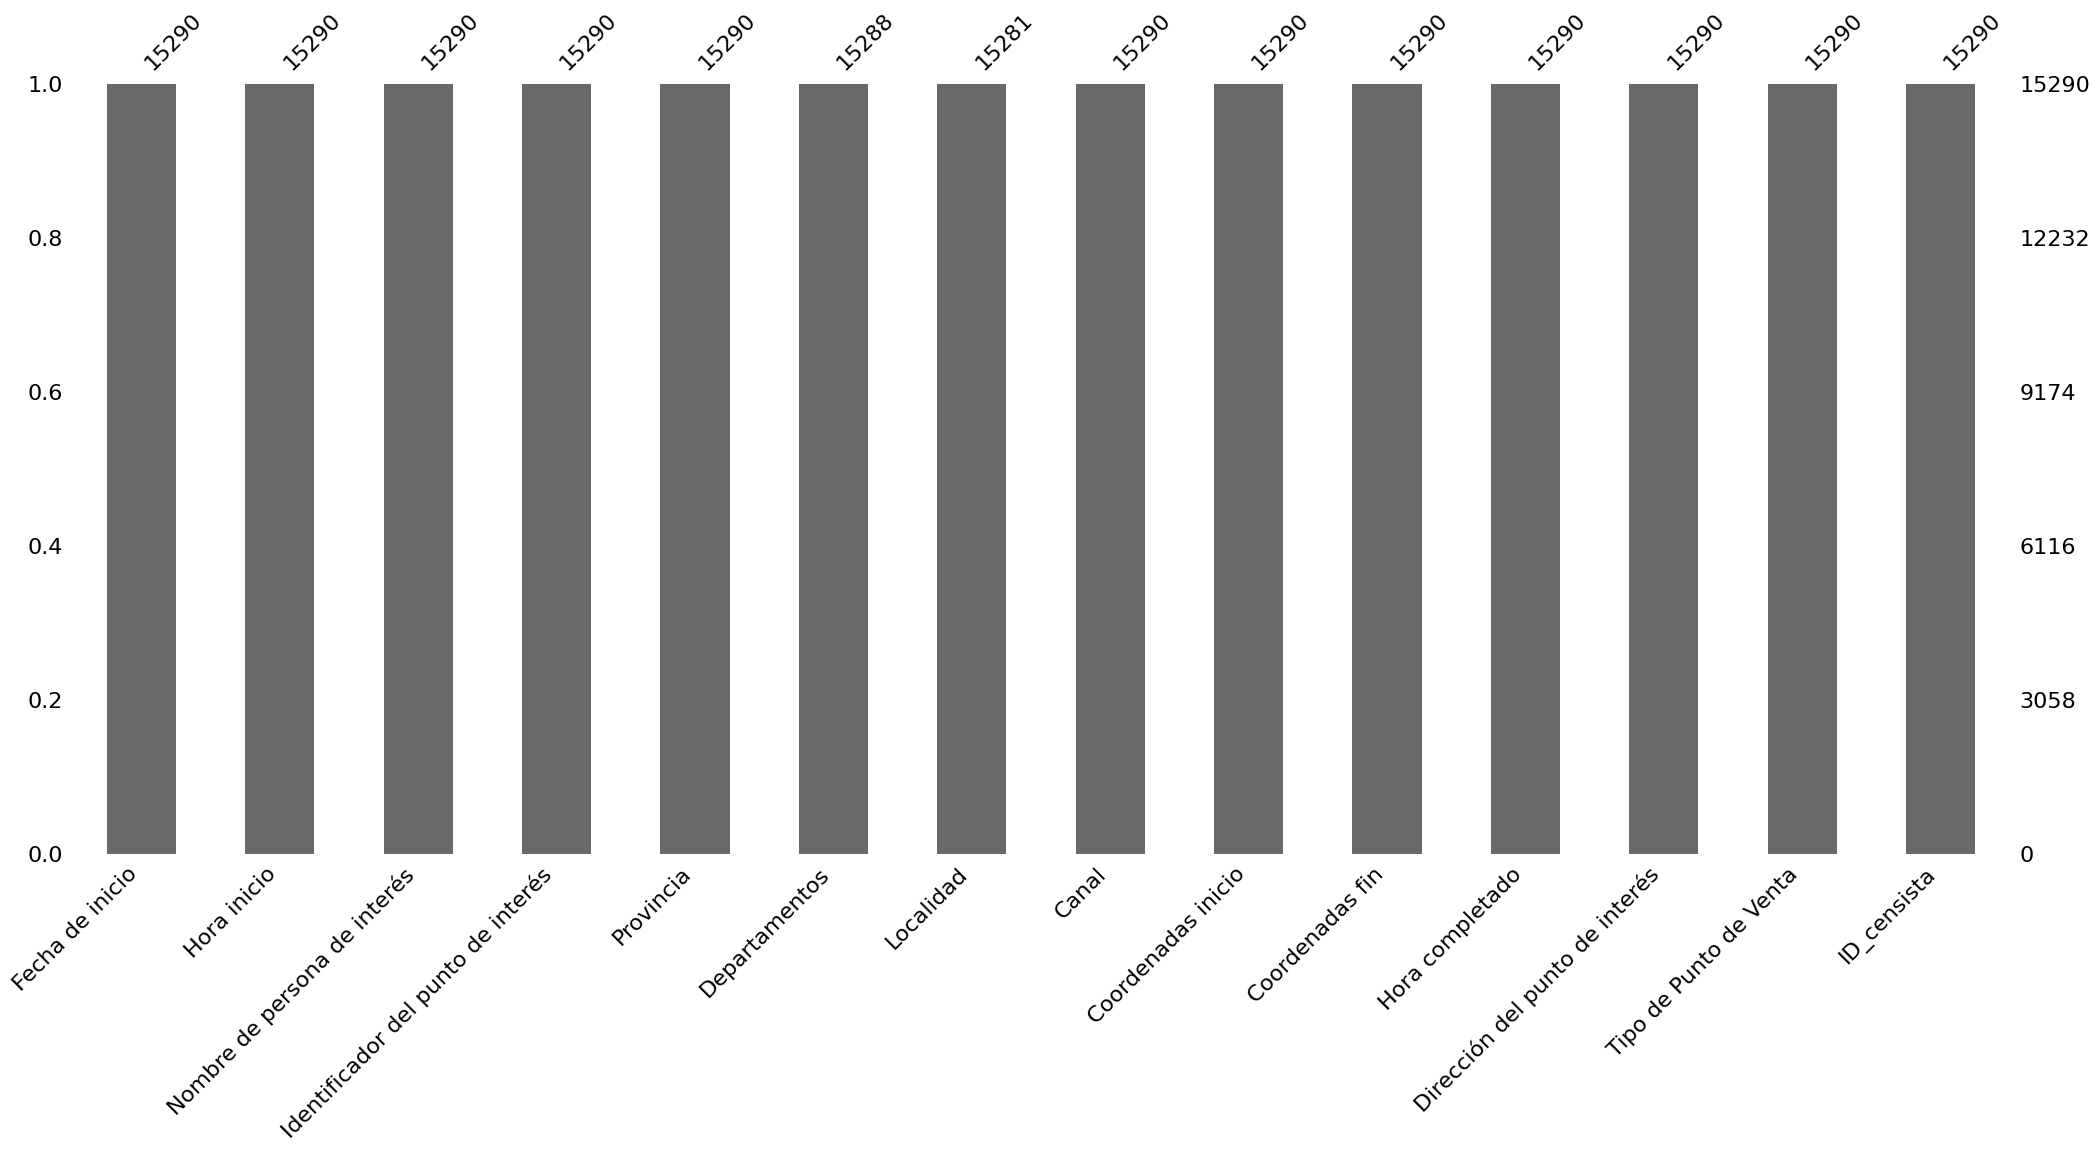

In [ ]:
msno.bar(reporte)

In [ ]:
#eliminamos los NA
reporte = reporte.dropna()


In [ ]:
valores_unicos_Provincia = df['Provincia'].unique()
print(valores_unicos_Provincia)

['San Juan' 'Santiago del Estero' 'Catamarca' 'La Rioja' 'Buenos Aires'
 'Entre Ríos' 'Santa Fe' 'Río Negro' 'Neuquén' 'Corrientes' 'Misiones'
 'Córdoba']


Una vez que hayamos generado el DataFrame dedicado al seguimiento del censo, iniciaremos las etapas de limpieza y transformación de datos. Estas fases revisten una importancia fundamental, ya que permiten facilitar la extracción de información adicional y más detallada a partir de los datos contenidos en el DataFrame. La limpieza y transformación de datos constituyen procesos esenciales que posibilitan un análisis más profundo y la obtención de perspicacias adicionales acerca de los datos en cuestión.

## **UNIFICACION DE COLUMNAS**

El proceso de consolidación de valores relevantes se basa en la necesidad de unificar la representación de datos equivalentes. En el contexto particular de este análisis, nos encontramos con varias columnas diseñadas para registrar la disponibilidad del producto 'Oreo' en distintos puntos de venta. En estas columnas, como 'Oreo1', 'Oreo2' y 'Oreo3', los valores binarios reflejan si el producto está disponible ('1') o no lo está ('0') en el punto de venta correspondiente.

Para ilustrar este proceso, consideremos un ejemplo: 'Oreo3' se asocia a los establecimientos de tipo 'Maxi kiosco', mientras que 'Oreo2' se relaciona con los 'almacenes'. Dado que la información se organiza en filas, cuando una fila que corresponde a un 'Maxi kiosco' se cruza con la columna 'Oreo2' (originalmente asociada a 'almacén'), se genera un valor 'NA'. Esto indica que la información se superpone y, por tanto, requiere un proceso de unificación para garantizar que los valores originales se mantengan sin alteraciones.

Además, es importante resaltar que este proceso de consolidación no solo mejora la interpretación de los datos, sino que también contribuye a reducir la dimensión


|  Tipo de Punto de Venta  |  oreo3  |  oreo2  |
|---------------------------|---------|---------|
|      Maxi kiosco         |    0    |    NA   |
|      Almacén             |    NA   |    1    |
|      Maxi kiosco         |    1    |    NA   |
|      Almacén             |    NA   |    0    |
|      Maxi kiosco         |    1    |    NA   |
|      Almacén             |    NA   |    1    |




despues de la unificacion



|  Tipo de Punto de Venta  |  Oreo  |
|---------------------------|--------|
|      Maxi kiosco         |   0    |
|      Almacén             |   1    |
|      Maxi kiosco         |   1    |
|      Almacén             |   0    |
|      Maxi kiosco         |   1    |
|      Almacén             |   1    |


En nuestro conjunto de datos, disponemos de un conjunto compuesto por un total de 75 marcas distintas, las cuales se repiten de manera sistemática en un factor de 5. En términos prácticos, al momento de descargar la base de datos, nos encontramos con la presencia de 375 columnas, cada una de ellas designada para representar las diversas marcas, y cada marca se repite en 5 columnas distintas.

Como resultado de este proceso de consolidación de datos, se logra reducir la complejidad y la redundancia de la información. Esto se traduce en una disminución drástica en la cantidad de columnas utilizadas, reduciéndose finalmente de 375 a solamente 75 columnas destinadas a representar las marcas, lo que facilita el análisis y la interpretación de la base de datos.

In [ ]:
# Lista de columnas a unificar
columnas_unificar = ['Oreo', 'Oreo.1', 'Oreo.2', 'Oreo.3', 'Oreo.4']

df[columnas_unificar] = df[columnas_unificar].replace('N/A', 0)

# Reemplazar los valores NaN por 0 en las columnas
df[columnas_unificar] = df[columnas_unificar].fillna(0)

# Convertir todas las celdas en las columnas a tipo entero
df[columnas_unificar] = df[columnas_unificar].astype(int)

# Sumar los valores de las columnas y crear la columna 'Oreo_Unificada'
df['Oreo_1'] = df[columnas_unificar].sum(axis=1)

# Eliminar las columnas originales
df = df.drop(columnas_unificar, axis=1)


In [ ]:
columnas_unificar=['Cadbury','Cadbury.1','Cadbury.2','Cadbury.3','Cadbury.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A', 0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Cadbury_1'] = df[columnas_unificar].sum(axis=1)
df = df.drop(columnas_unificar, axis=1)

In [ ]:
columnas_unificar=['Milka','Milka.1','Milka.2','Milka.3','Milka.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A', 0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Milka_1'] = df[columnas_unificar].sum(axis=1)
df = df.drop(columnas_unificar, axis=1)


In [ ]:
columnas_unificar=['Toblerone','Toblerone.1','Toblerone.2','Toblerone.3','Toblerone.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A', 0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Toblerone_1'] = df[columnas_unificar].sum(axis=1)
df = df.drop(columnas_unificar, axis=1)


In [ ]:
columnas_unificar=['Halls','Halls.1','Halls.2','Halls.3','Halls.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Halls_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Tang','Tang.1','Tang.2','Tang.3','Tang.4','Tang.5']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Tang_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)


In [ ]:
columnas_unificar=['Club Social','Club Social.1','Club Social.2','Club Social.3','Club Social.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Club_Social_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Royal','Royal.1','Royal.2','Royal.3','Royal.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Royal_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar = ['Clight', 'Clight.1', 'Clight.2', 'Clight.3', 'Clight.4', 'Clight.5']
df[columnas_unificar] = df[columnas_unificar].replace('N/A', 0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Clight_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Terrabusi','Terrabusi.1','Terrabusi.2','Terrabusi.3','Terrabusi.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Terrabusi_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Variedad','Variedad.1','Variedad.2','Variedad.3','Variedad.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Variedad_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)


In [ ]:
columnas_unificar =['Beldent','Beldent.1','Beldent.2','Beldent.3','Beldent.4','Beldent.5']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Beldent_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Bubaloo','Bubaloo.1','Bubaloo.2','Bubaloo.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Bubaloo_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Criollitas','Criollitas.1','Criollitas.2','Criollitas.3','Criollitas.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Criollitas_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Diversion','Diversion.1','Diversion.2','Diversion.3','Diversion.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Diversion_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Flics','Flics.1','Flics.2','Flics.3','Flics.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Flics_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Formis','Formis.1','Formis.2','Formis.3','Formis.4',]
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Formis_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Cofler','Cofler.1','Cofler.2','Cofler.3','Cofler.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Cofler_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Hogareñas','Hogareñas.1','Hogareñas.2','Hogareñas.3','Hogareñas.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Hogareñas_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Kesitas','Kesitas.1','Kesitas.2','Kesitas.3','Kesitas.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Kesitas_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['La campagnola','La campagnola.1','La campagnola.2','La campagnola.3','La campagnola.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['La_campagnola_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Macucas','Macucas.1','Macucas.2','Macucas.3','Macucas.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Macucas_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Maná','Maná.1','Maná.2','Maná.3','Maná.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Maná_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Mellizas','Mellizas.1','Mellizas.2','Mellizas.3','Mellizas.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Mellizas_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Menthoplus','Menthoplus.1','Menthoplus.2','Menthoplus.3','Menthoplus.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Menthoplus_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Merengadas','Merengadas.1','Merengadas.2','Merengadas.3','Merengadas.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Merengadas_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Mogul','Mogul.1','Mogul.2','Mogul.3','Mogul.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Mogul_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Mister Pops','Mister Pops.1','Mister Pops.2','Mister Pops.3','Mister Pops.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Mister_Pops_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Natural Break','Natural Break.1','Natural Break.2','Natural Break.3','Natural Break.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Natural_Break_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Nereida','Nereida.1','Nereida.2','Nereida.3','Nereida.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Nereida_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Opera','Opera.1','Opera.2','Opera.3','Opera.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Opera_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Poncho Negro','Poncho Negro.1','Poncho Negro.2','Poncho Negro.3','Poncho Negro.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Poncho_Negro_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Porteñitas','Porteñitas.1','Porteñitas.2','Porteñitas.3','Porteñitas.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Porteñitas_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Seven','Seven.1','Seven.2','Seven.3','Seven.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Seven_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Topline','Topline.1','Topline.2','Topline.3','Topline.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Topline_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Toddy','Toddy.1','Toddy.2','Toddy.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Toddy_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Flynpaff','Flynpaff.1','Flynpaff.2','Flynpaff.3','Flynpaff.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Flynpaff_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Nucream','Nucream.1','Nucream.2','Nucream.3','Nucream.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Nucream_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Full mani','Full mani.1','Full mani.2', 'Full mani.3','Full mani.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Full_mani_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Sin azucares','Sin azucares.1','Sin azucares.2','Sin azucares.3','Sin azucares.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Sin_azucares_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Bazooka','Bazooka.1','Bazooka.2','Bazooka.3','Bazooka.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Bazooka_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Palitos de la selva','Palitos de la selva.1','Palitos de la selva.2','Palitos de la selva.3','Palitos de la selva.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Palitos_de_la_selva_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Flow cereal','Flow cereal.1','Flow cereal.2','Flow cereal.3','Flow cereal.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Flow_cereal_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Flynnies yogur','Flynnies yogur.1','Flynnies yogur.2','Flynnies yogur.3','Flynnies yogur.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Flynnies_yogur_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Mantecol','Mantecol.1','Mantecol.2','Mantecol.3','Mantecol.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Mantecol_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Philipp Morris','Philipp Morris.1','Philipp Morris.2','Philipp Morris.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Philipp_Morris_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Malboro','Malboro.1','Malboro.2','Malboro.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Malboro_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Lucky Strike','Lucky Strike.1','Lucky Strike.2','Lucky Strike.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Lucky_Strike_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)


In [ ]:
columnas_unificar=['Chesterfields','Chesterfields.1','Chesterfields.2','Chesterfields.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Chesterfields_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)


In [ ]:
columnas_unificar=['Red Point','Red Point.1','Red Point.2','Red Point.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Red_Point_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Melbour','Melbour.1','Melbour.2','Melbour.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Melbour_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Stella Artois','Stella Artois.1','Stella Artois.2','Stella Artois.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Stella_Artois_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Quilmes','Quilmes.1','Quilmes.2','Quilmes.3','Quilmes.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Quilmes_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Patagonia','Patagonia.1','Patagonia.2','Patagonia.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Patagonia_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)


In [ ]:
columnas_unificar=['Corona','Corona.1','Corona.2','Corona.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Corona_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)


In [ ]:
columnas_unificar=['Budweisser','Budweisser.1','Budweisser.2','Budweisser.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Budweisser_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Brahma','Brahma.1','Brahma.2','Brahma.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Brahma_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Andes','Andes.1','Andes.2','Andes.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Andes_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Coca Cola','Coca Cola.1','Coca Cola.2','Coca Cola.3','Coca Cola.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Coca_Cola_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Fanta','Fanta.1','Fanta.2','Fanta.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Fanta_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)


In [ ]:
columnas_unificar=['Sprite','Sprite.1','Sprite.2','Sprite.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Sprite_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)


In [ ]:
columnas_unificar=['Schweppes','Schweppes.1','Schweppes.2','Schweppes.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Schweppes_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['powerade','powerade.1','powerade.2','powerade.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['powerade_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Cepita','Cepita.1','Cepita.2','Cepita.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Cepita_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Pepsi','Pepsi.1','Pepsi.2','Pepsi.3','Pepsi.4']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Pepsi_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Seven U','Seven U.1','Seven U.2','Seven U.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Seven_U_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Tropicana','Tropicana.1','Tropicana.2','Tropicana.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Tropicana_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Quaker','Quaker.1','Quaker.2','Quaker.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Quaker_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Lays','Lays.1','Lays.2','Lays.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Lays_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Doritos','Doritos.1','Doritos.2','Doritos.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Doritos_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Cheetos','Cheetos.1','Cheetos.2','Cheetos.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Cheetos_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Gatorade','Gatorade.1','Gatorade.2','Gatorade.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Gatorade_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Paso de los toros','Paso de los toros.1','Paso de los toros.2','Paso de los toros.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Paso_de_los_toros_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Mirinda','Mirinda.1','Mirinda.2','Mirinda.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Mirinda_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['H2OH!','H2OH!.1','H2OH!.2','H2OH!.3']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['H2OH!_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

----------------------


In [ ]:
columnas_unificar=['Mondelez','Mondelez.1']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['MDLZ_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
columnas_unificar=['Arcor.1','Arcor']
df[columnas_unificar] = df[columnas_unificar].replace('N/A',0)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Arcor_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:

columnas_unificar = ['Cantidad de Heladeras', 'Cantidad de heladeras.1', 'Cantidad de Heladeras visibles']
df[columnas_unificar] = df[columnas_unificar].replace('N/A', 0)
# Reemplazar '3 o más' por 3
df[columnas_unificar] = df[columnas_unificar].replace('3 o más', 3)
df[columnas_unificar] = df[columnas_unificar].fillna(0)
df[columnas_unificar] = df[columnas_unificar].astype(int)
df['Cantidad_de_heladeras_1'] = df[columnas_unificar].sum(axis=1)
df = df.drop(columnas_unificar, axis=1)


In [ ]:
columnas_unificar=['Estado del inmueble.1','Estado del inmueble','Estado de Inmueble.2','Estado de Inmueble.1','Estado de Inmueble']
df[columnas_unificar] = df[columnas_unificar].replace('N/A'," ")
df[columnas_unificar] = df[columnas_unificar].fillna(" ")
df['Estado_de_Inmueble_1'] = df[columnas_unificar].sum(axis=1)
df=df.drop(columnas_unificar,axis=1)

In [ ]:
df['Estado_de_Inmueble_1'].unique()

array([' Ordenado y Limpio   ', '     ', ' En condiciones aceptables   ',
       '   Ordenado y Limpio ', '   En condiciones aceptables ',
       '    Ordenado y limpio', '  Ordenado y Limpio  ',
       'Ordenado y Limpio    ', '  En condiciones aceptables  ',
       '    En condiciones aceptables', ' Precario   ', '   Precario ',
       '    Precario', 'En condiciones aceptables    ', 'Precario    ',
       '  Precario  '], dtype=object)

In [ ]:
remplazos={'   Ordenado y Limpio ':'Ordenado y Limpio',
    ' Ordenado y Limpio   ':'Ordenado y Limpio',
    'Ordenado y limpio    ':'Ordenado y Limpio',
    '  Ordenado y Limpio  ':'Ordenado y Limpio',
    '    Ordenado y Limpio':'Ordenado y Limpio',
    '   En condiciones aceptables ':'En condiciones aceptables',
    ' En condiciones aceptables   ':'En condiciones aceptables',
    '  En condiciones aceptables  ':'En condiciones aceptables',
    'En condiciones aceptables    ':'En condiciones aceptables',
    '    En condiciones aceptables':'En condiciones aceptables',
    '   En condiciones aceptables ':'En condiciones aceptables',
    '   En condiciones aceptables ':'En condiciones aceptables',
    '   Precario ':'Precario',
    ' Precario   ':'Precario',
    'Precario    ':'Precario',
    '    Precario':'Precario',
    '  Precario  ':'Precario',
    'Ordenado y Limpio    ':'Ordenado y Limpio',
    '    Ordenado y limpio':'Ordenado y limpio',
    'Ordenado y limpio':'Ordenado y Limpio'
}

    # Aplicar el mapeo a la columna 'Localidad'
df['Estado_de_Inmueble_1'] = df['Estado_de_Inmueble_1'].replace(remplazos)

# Verificar los valores únicos después del mapeo
valores_unicos = df['Estado_de_Inmueble_1'].unique()
print(valores_unicos)

['Ordenado y Limpio' '     ' 'En condiciones aceptables' 'Precario']


## **COLUMNA "OBSERVACIONES**

La columna "Observaciones" se presenta como una columna de texto libre que contiene una gran cantidad de información. Con el objetivo de extraer información valiosa de esta columna, llevaremos a cabo un proceso de iteración en busca de patrones de texto. El propósito de esta iteración es identificar palabras clave que puedan indicar oportunidades corporativas. En caso de que el algoritmo detecte cualquiera de estas palabras clave en las observaciones, se asignará un valor de 1 en una columna adicional denominada "Oportunidades". Por otro lado, si no se encuentra ningún patrón relacionado con las palabras clave, la columna "Oportunidades" se completará con el valor de 0.

Este enfoque permitirá automatizar la identificación de oportunidades corporativas en el texto libre de las observaciones, lo que facilitará un análisis más eficiente y efectivo de los datos.las palabras que se buscaran son las siguientes:

+ 'visita'
+ 'preventista'
+ 'mondelez'
+ 'vendedor'
+ 'delez'
+ 'interesa'
+ 'quiere'
+ 'solicita'
+ 'compra'
+ 'pedido'
+ 'desea'
+ 'dejo'
+ 'distribuid'
+ 'mkm'
+ 'delez'
+ 'global'
+ 'dulce'
+ 'andretich'
+ 'hard'
+ 'pianez'
+ 'ifnk'
+ 'perels'
+ 'terrabusi'

Estas palabras clave se utilizarán en el proceso de iteración para buscar patrones de texto en la columna de observaciones y determinar si alguna de ellas está presente en el texto, lo que indicará la existencia de oportunidades corporativas.

In [ ]:
import re

#  lista de palabras clave
palabras_clave = [ 'visita', 'preventista', 'mondelez', 'vendedor', 'delez', 'interesa',"quiere", "solicita", "compra", "pedido", "desea", "dejo", "distribuid",
 "mkm", "delez", "global", "dulce", "andretich", "hard", "pianez", "ifnk", "perels","terrabusi"]

# Función para buscar patrones en una observación
def buscar_patrones(observacion):
    if isinstance(observacion, str):
        observacion = observacion.lower()  # Convertir la observación a minúsculas
        for palabra in palabras_clave:
            patron = r'\b' + palabra + r'\w*'  # Usamos \w* para permitir cualquier carácter después de la palabra clave
            if re.search(patron, observacion):
                return 1
    return 0

# Aplicar la función a la columna "Observaciones" y crear la columna "Oportunidades"
df['Oportunidades'] = df['Observaciones'].apply(buscar_patrones)


## **MAS LIMPIEZA**

Cabe destacar que en nuestras columnas relacionadas con las marcas, se han registrado valores que no se limitan a 0 o 1. Esta variabilidad de valores indica que los censistas han respondido a la misma pregunta en dos columnas distintas; por ejemplo, han marcado "1" tanto en la columna 'coca' como en 'cocola2', lo que resulta en una suma de 2. Desde nuestra perspectiva, esta suma de valores 2 denota, en esencia, una sola afirmación: que el establecimiento en cuestión vende el producto "coca cola".

Con el propósito de abordar esta situación, hemos implementado un bucle que recorre las columnas que contienen valores distintos a 0 o 1. Cuando el bucle identifica un valor superior a 1 en una de estas columnas, lo transforma en 1. Este proceso permite consolidar la información de manera uniforme, asegurando que la presencia de una marca en el local se refleje de manera coherente en el conjunto de datos.

In [ ]:
df['Coca_Cola_1']

1        2
2        2
3        2
4        2
5        2
        ..
15298    0
15299    0
15300    0
15301    0
15302    0
Name: Coca_Cola_1, Length: 15290, dtype: int64

In [ ]:
columnas_a_modificar = [ 'Oreo_1', 'Cadbury_1', 'Milka_1', 'Toblerone_1', 'Halls_1',
                        'Tang_1', 'Club_Social_1', 'Royal_1', 'Clight_1', 'Terrabusi_1',
                        'Variedad_1', 'Beldent_1', 'Bubaloo_1', 'Criollitas_1', 'Diversion_1',
                        'Flics_1', 'Formis_1', 'Cofler_1', 'Hogareñas_1', 'Kesitas_1', 'La_campagnola_1',
                        'Macucas_1', 'Maná_1', 'Mellizas_1', 'Menthoplus_1', 'Merengadas_1', 'Mogul_1',
                        'Mister_Pops_1', 'Natural_Break_1', 'Nereida_1', 'Opera_1', 'Poncho_Negro_1',
                        'Porteñitas_1', 'Seven_1', 'Topline_1', 'Toddy_1', 'Flynpaff_1', 'Nucream_1',
                        'Full_mani_1', 'Sin_azucares_1', 'Bazooka_1', 'Palitos_de_la_selva_1', 'Flow_cereal_1',
                        'Flynnies_yogur_1', 'Mantecol_1', 'Philipp_Morris_1', 'Malboro_1', 'Lucky_Strike_1',
                        'Chesterfields_1', 'Red_Point_1', 'Melbour_1', 'Stella_Artois_1', 'Quilmes_1',
                        'Patagonia_1', 'Corona_1', 'Budweisser_1', 'Brahma_1', 'Andes_1', 'Coca_Cola_1',
                        'Fanta_1', 'Sprite_1', 'Schweppes_1', 'powerade_1', 'Cepita_1', 'Pepsi_1', 'Seven_U_1',
                        'Tropicana_1', 'Quaker_1', 'Lays_1', 'Doritos_1', 'Cheetos_1', 'Gatorade_1', 'Paso_de_los_toros_1',
                        'Mirinda_1', 'H2OH!_1', 'MDLZ_1', 'Arcor_1', 'Cantidad_de_heladeras_1']

for columna in columnas_a_modificar:
    df[columna] = df[columna].apply(lambda x: 1 if x > 1 else x)



## **OBTENIENDO LOS DATOS:**


El objetivo principal de este proceso de limpieza de datos es la obtención de una base de datos funcional y libre de información superflua. Para lograr este propósito, hemos optado por la individualización de cada punto de venta, basándonos en la consideración de que las preguntas relacionadas con otros tipos de datos solo contribuyen a aumentar la dimensionalidad de nuestros datos sin agregar un valor sustancial.

En esta etapa inicial, nos centraremos en la obtención de datos de las vinotecas y las farmacias, ya que a estos puntos de venta no se les realizan preguntas específicas acerca de marcas. Esto simplifica considerablemente la creación de DataFrames específicos para cada categoría, permitiéndonos enfocarnos en la información relevante. En cuanto a los puntos de venta a los que se les plantean preguntas sobre marcas, abordaremos este caso con mayor complejidad en etapas posteriores del proceso.





In [ ]:
columnas_seleccionadas = ['Fecha de inicio', 'Hora inicio', 'Coordenadas inicio', 'Fecha completado',
                          'Hora completado', 'Coordenadas fin',
                          'Nombre de persona de interés', 'Identificador del punto de interés',
                          'Nombre del punto de interés', 'Departamento del punto de interés',
                          'Dirección del punto de interés', 'Provincia', 'Departamentos', 'Localidad',
                          'Tipo de Punto de Venta', 'Razón Social', 'CUIT', 'Papeles?', 'Canal',
                          'Comercializa chocolates(Vinoteca)', 'Se acerca un repositor de Mondelez?',
                          'Se acerca un repositor de la competencia?', 'En caso de que sea otro, indicar con quien',
                          'Estado_de_Inmueble_1','Observaciones','Oportunidades','ID_censista']

# Filtra el DataFrame original para obtener solo las filas donde 'Canal' es igual a 'Vinoteca'.
vinoteca = df[df['Canal'] == 'Vinoteca'][columnas_seleccionadas].copy()


In [ ]:
columnas_seleccionadas= ['Fecha de inicio', 'Hora inicio', 'Coordenadas inicio',
 'Fecha completado', 'Hora completado', 'Coordenadas fin',
 'ID_censista', 'Nombre de persona de interés',
 'Identificador del punto de interés', 'Nombre del punto de interés',
 'Departamento del punto de interés', 'Dirección del punto de interés',
 'Provincia', 'Departamentos', 'Localidad', 'Tipo de Punto de Venta',
 'Razón Social', 'CUIT', 'Papeles?', 'Canal', 'Comercializa productos de kiosco(farmacia)',
 'Se acerca un repositor de Mondelez?', 'Se acerca un repositor de la competencia?',
 'En caso de que sea otro, indicar con quien','Estado_de_Inmueble_1', 'Observaciones','Oportunidades']


Farmacia_Perfumería = df[df['Canal']=='Farmacia / Perfumería'][columnas_seleccionadas].copy()

## **CONSIGUIENDO LA INFORMACION RELEVANTE**

A continuación, procederemos a la declaración de dos listas. La primera de ellas contendrá las columnas que representarán los valores de las marcas, mientras que la segunda lista estará compuesta por las columnas que permanecerán constantes y no experimentarán cambios. Esta distinción es esencial para organizar y estructurar de manera eficiente el DataFrame en el proceso subsiguiente. La primera lista alberga aquellas columnas que desempeñarán un papel clave en la representación de las marcas, mientras que la segunda lista preserva las columnas inalteradas, garantizando su integridad y consistencia en todo momento.

A continuación, procederemos a realizar una operación de pivoteo en las columnas de nuestro DataFrame. En una primera fase, pivotaremos exclusivamente las columnas que representan las marcas de productos. Este proceso permitirá que dichas columnas sean reorganizadas y presentadas en filas en lugar de columnas.

Este es el resultado de la operación de pivoteo:

| Tipo     | Marca1 | Marca2 | Marca3 |
|----------|--------|--------|--------|
| Negocio1 | Sí     | No     | Sí     |
| Negocio2 | No     | Sí     | No     |
| Negocio3 | Sí     | Sí     | Sí     |


Después del pivoteo:

| Tipo     | Marca  | Tiene |
|----------|--------|-------|
| Negocio1 | Marca1 | Sí    |
| Negocio1 | Marca2 | No    |
| Negocio1 | Marca3 | Sí    |
| Negocio2 | Marca1 | No    |
| Negocio2 | Marca2 | Sí    |
| Negocio2 | Marca3 | No    |
| Negocio3 | Marca1 | Sí    |
| Negocio3 | Marca2 | Sí    |
| Negocio3 | Marca3 | Sí    |

Previo a llevar a cabo la operación de pivoteo en las columnas que representan las marcas de productos, es crucial realizar una validación de los valores contenidos en dichas columnas. Nuestro objetivo es identificar si existen valores diferentes de "0" y "1" en estas columnas. Esta comprobación es fundamental para asegurar la integridad y consistencia de los datos.

La finalidad de esta verificación es garantizar que las columnas de marcas solo contengan valores binarios (es decir, "0" o "1"), lo que facilitará el proceso de pivoteo y la representación de las marcas como filas. Cualquier valor diferente a estos dos podría causar incongruencias en la operación de pivoteo y, por lo tanto, se considera un paso crítico en el proceso de preparación de datos.

Procedemos a la operación de pivoteo en las columnas de interés. Este proceso es esencial para reorganizar y reestructurar los datos de manera que sean más adecuados para análisis posteriores. El pivoteo de las columnas seleccionadas permitirá una representación más efectiva de los datos y facilitará su interpretación y análisis.

In [ ]:
nombre_de_columnas = df.columns.tolist()
print(nombre_de_columnas)

['Fecha de inicio', 'Hora inicio', 'Coordenadas inicio', 'Fecha completado', 'Hora completado', 'Coordenadas fin', 'Identificador de persona de interés', 'Nombre de persona de interés', 'Identificador del punto de interés', 'Nombre del punto de interés', 'Departamento del punto de interés', 'Dirección del punto de interés', 'Provincia', 'Departamentos', 'Localidad', 'Tipo de Punto de Venta', 'Razón Social', 'CUIT', 'Papeles?', 'Canal', 'Cantidad de Cajas(Autoservicio)', 'Cantidad de Góndolas(Autoservicio)', 'Tiene Verdulería(Autoservicio)', 'Tiene Fiambrería(Autoservicio)', 'Heladeras con lacteos(Autoservicio)', 'Heladeras con bebidas(Autoservicio)', 'Cantidad de heladeras', 'Cantidad de Exhibidores de primeras marcas (Lays/Gaseosas/Cervezas)(Almacen)', 'Tiene surtido de vinos(Almacen)', 'Tiene Heladera de lácteos(Almacen)', 'Tiene gondola(Maxi Kiosco)', 'En caso de que si tenga gondola, cuan llena esta?(Maxi Kiosco)', 'Tiene exhibidor de chicles/caramelos(Maxi Kiosco)', 'En caso de te

In [ ]:
# Hacemos una lista con las columnas que queremos pivotear.
Marcas = ['Oreo_1', 'Cadbury_1', 'Milka_1', 'Toblerone_1', 'Halls_1', 'Tang_1', 'Club_Social_1', 'Royal_1', 'Clight_1', 'Terrabusi_1', 'Variedad_1', 'Beldent_1', 'Bubaloo_1', 'Criollitas_1', 'Diversion_1', 'Flics_1', 'Formis_1', 'Cofler_1', 'Hogareñas_1', 'Kesitas_1', 'La_campagnola_1', 'Macucas_1', 'Maná_1', 'Mellizas_1', 'Menthoplus_1', 'Merengadas_1', 'Mogul_1', 'Mister_Pops_1', 'Natural_Break_1', 'Nereida_1', 'Opera_1', 'Poncho_Negro_1', 'Porteñitas_1', 'Seven_1', 'Topline_1', 'Toddy_1', 'Flynpaff_1', 'Nucream_1', 'Full_mani_1', 'Sin_azucares_1', 'Bazooka_1', 'Palitos_de_la_selva_1', 'Flow_cereal_1', 'Flynnies_yogur_1', 'Mantecol_1', 'Philipp_Morris_1', 'Malboro_1', 'Lucky_Strike_1', 'Chesterfields_1', 'Red_Point_1', 'Melbour_1', 'Stella_Artois_1', 'Quilmes_1', 'Patagonia_1', 'Corona_1', 'Budweisser_1', 'Brahma_1', 'Andes_1', 'Coca_Cola_1', 'Fanta_1', 'Sprite_1', 'Schweppes_1', 'powerade_1', 'Cepita_1', 'Pepsi_1', 'Seven_U_1', 'Tropicana_1', 'Quaker_1', 'Lays_1', 'Doritos_1', 'Cheetos_1', 'Gatorade_1', 'Paso_de_los_toros_1', 'Mirinda_1', 'H2OH!_1']

In [ ]:
#hacemos una lista de las columnas que no queremos pivotear.
columas_que_no_cambiaran= [columna for columna in df.columns if columna not in Marcas]
print(columas_que_no_cambiaran)

['Fecha de inicio', 'Hora inicio', 'Coordenadas inicio', 'Fecha completado', 'Hora completado', 'Coordenadas fin', 'Identificador de persona de interés', 'Nombre de persona de interés', 'Identificador del punto de interés', 'Nombre del punto de interés', 'Departamento del punto de interés', 'Dirección del punto de interés', 'Provincia', 'Departamentos', 'Localidad', 'Tipo de Punto de Venta', 'Razón Social', 'CUIT', 'Papeles?', 'Canal', 'Cantidad de Cajas(Autoservicio)', 'Cantidad de Góndolas(Autoservicio)', 'Tiene Verdulería(Autoservicio)', 'Tiene Fiambrería(Autoservicio)', 'Heladeras con lacteos(Autoservicio)', 'Heladeras con bebidas(Autoservicio)', 'Cantidad de heladeras', 'Cantidad de Exhibidores de primeras marcas (Lays/Gaseosas/Cervezas)(Almacen)', 'Tiene surtido de vinos(Almacen)', 'Tiene Heladera de lácteos(Almacen)', 'Tiene gondola(Maxi Kiosco)', 'En caso de que si tenga gondola, cuan llena esta?(Maxi Kiosco)', 'Tiene exhibidor de chicles/caramelos(Maxi Kiosco)', 'En caso de te

In [ ]:
#Se realiza la pivotacion de las columnas de interes relacionadas a las marcas.
df_bi = pd.melt(df, id_vars=columas_que_no_cambiaran, value_vars=Marcas, var_name='Marcas', value_name='Tiene')

## **RESUMEN GENERAL DE LOS PASOS QUE HEMOS COMPLETADO HASTA EL MOMENTO:**

1) Realizamos la limpieza de datos inicial para asegurarnos de que la base de datos esté en un estado funcional y libre de información innecesaria o irrelevante.

2) Generamos un DataFrame denominado "reporte" con el propósito de habilitar un seguimiento detallado del proceso de censo y proporcionar una visión exhaustiva de las actividades relacionadas con esta acción.

3) Unificamos los valores de las columnas relacionadas con las marcas para garantizar la coherencia y la uniformidad de la información.

4) Creamos DataFrames específicos para los puntos de venta de "vinoteca" y "farmacia", ya que a estos puntos de venta no se les realizan preguntas específicas acerca de marcas.

5) Realizamos una pivotación de las columnas relacionadas con las marcas para crear un DataFrame llamado "df_bi", que nos permite analizar la presencia de marcas en los diferentes puntos de venta de manera más eficiente.


Entendido, lo siguiente en el proceso es crear DataFrames para los puntos de venta a los que se les realizan preguntas acerca de las marcas. Para lograr esto, utilizaremos el DataFrame denominado "df_bi" como punto de partida, ya que este contiene las columnas de marcas unificadas en una sola, lo que facilitará la generación de DataFrames específicos para cada uno de estos puntos de venta. Este enfoque permitirá un manejo más eficiente de los datos y una mayor coherencia en el análisis de las marcas en los diferentes tipos de establecimientos.

In [ ]:
columnas_seleccionadas = ['Fecha de inicio', 'Hora inicio', 'Coordenadas inicio', 'Fecha completado',
 'Hora completado', 'Coordenadas fin', 'Identificador de persona de interés',
 'Nombre de persona de interés', 'Identificador del punto de interés',
 'Nombre del punto de interés', 'Departamento del punto de interés',
 'Dirección del punto de interés', 'Provincia', 'Departamentos', 'Localidad',
 'Tipo de Punto de Venta', 'Razón Social', 'CUIT', 'Papeles?', 'Canal',
 'Cantidad de Cajas(Autoservicio)', 'Cantidad de Góndolas(Autoservicio)',
 'Tiene Verdulería(Autoservicio)', 'Tiene Fiambrería(Autoservicio)',
 'Heladeras con lacteos(Autoservicio)', 'Heladeras con bebidas(Autoservicio)',
 'Trabaja con?', 'Distribuidor', 'Frecuencia de Visita', 'Frecuencia de entrega',
 'Se acerca un repositor de Mondelez?', 'Se acerca un repositor de la competencia?',
 'En caso de que sea otro, indicar con quien', 'Aplicaciones B2B', 'BEES', 'Serenisima',
 'MDLZ_1', 'Arcor_1','Marcas','Tiene', 'Cantidad_de_heladeras_1', 'Estado_de_Inmueble_1','Observaciones','Oportunidades']

Autoservicio_chino = df_bi[df_bi['Canal']=='Autoservicio / Chino'][columnas_seleccionadas].copy()


In [ ]:
columnas_seleccionadas = ['Fecha de inicio', 'Hora inicio','Coordenadas inicio', 'Fecha completado',
           'Hora completado', 'Coordenadas fin', 'ID_censista',
           'Nombre de persona de interés', 'Identificador del punto de interés',
           'Nombre del punto de interés', 'Departamento del punto de interés',
           'Dirección del punto de interés', 'Provincia', 'Departamentos', 'Localidad',
           'Tipo de Punto de Venta', 'Razón Social', 'CUIT', 'Papeles?', 'Canal',
           'Cantidad de Exhibidores de primeras marcas (Lays/Gaseosas/Cervezas)(Almacen)',
           'Tiene surtido de vinos(Almacen)', 'Tiene Heladera de lácteos(Almacen)','Trabaja con?',
           'Distribuidor', 'Frecuencia de Visita', 'Frecuencia de entrega', 'Se acerca un repositor de Mondelez?',
           'Se acerca un repositor de la competencia?', 'En caso de que sea otro, indicar con quien',
           'Aplicaciones B2B', 'BEES', 'Serenisima', 'Massalin', 'Observaciones', 'MDLZ_1',
           'Arcor_1', 'Cantidad_de_heladeras_1', 'Estado_de_Inmueble_1','Oportunidades']



almacén = df_bi[df_bi['Canal']=='Almacén'][columnas_seleccionadas].copy()


In [ ]:
columnas_seleccionadas = ['Fecha de inicio', 'Hora inicio', 'Coordenadas inicio', 'Fecha completado',
 'Hora completado', 'Coordenadas fin', 'ID_censista',
 'Nombre de persona de interés', 'Identificador del punto de interés', 'Nombre del punto de interés',
 'Departamento del punto de interés', 'Dirección del punto de interés', 'Provincia', 'Departamentos',
 'Localidad', 'Tipo de Punto de Venta', 'Razón Social', 'CUIT', 'Papeles?', 'Canal',
 'Tiene gondola(Maxi Kiosco)', 'En caso de que si tenga gondola, cuan llena esta?(Maxi Kiosco)',
 'Tiene exhibidor de chicles/caramelos(Maxi Kiosco)',
 'En caso de tener exhibidor de chicles/caramelos, cuan lleno esta?(Maxi Kiosco)',
 'No tiene servicios adicionales(Maxi Kiosco)', 'Fotocopias(Maxi Kiosco)', 'RapiPago(Maxi Kiosco)',
 'Tramites(Maxi Kiosco)', 'SUBE(Maxi Kiosco)','Trabaja con?', 'Distribuidor', 'Frecuencia de Visita',
 'Frecuencia de entrega', 'Se acerca un repositor de Mondelez?', 'Se acerca un repositor de la competencia?',
 'En caso de que sea otro, indicar con quien', 'Aplicaciones B2B', 'BEES', 'Serenisima', 'Massalin',
 'Observaciones','Oportunidades', 'MDLZ_1', 'Arcor_1', 'Cantidad_de_heladeras_1', 'Estado_de_Inmueble_1']

Maxi_Kiosco = df_bi[df_bi['Canal']=='Maxi Kiosco'][columnas_seleccionadas].copy()

In [ ]:
columnas_seleccionadas = ['Fecha de inicio', 'Hora inicio', 'Coordenadas inicio', 'Fecha completado',
 'Hora completado', 'Coordenadas fin', 'ID_censista',
 'Nombre de persona de interés', 'Identificador del punto de interés',
 'Nombre del punto de interés', 'Departamento del punto de interés',
 'Dirección del punto de interés', 'Provincia', 'Departamentos', 'Localidad',
 'Tipo de Punto de Venta', 'Razón Social', 'CUIT', 'Papeles?', 'Canal',
 'Cuan llena estan las estanterias(Kiosco Ventana)','Trabaja con?', 'Distribuidor',
 'Frecuencia de Visita', 'Frecuencia de entrega', 'Se acerca un repositor de Mondelez?',
 'Se acerca un repositor de la competencia?', 'En caso de que sea otro, indicar con quien',
 'Aplicaciones B2B', 'BEES', 'Serenisima', 'Massalin', 'Observaciones', 'MDLZ_1', 'Arcor_1',
 'Cantidad_de_heladeras_1', 'Estado_de_Inmueble_1','Oportunidades','Marcas', 'Tiene']

Kiosco_ventana = df_bi[df_bi['Canal']=='Kiosco Ventana'][columnas_seleccionadas].copy()

In [ ]:
df['Canal'].unique()

array(['Maxi Kiosco', 'Kiosco Ventana', 'Almacén', 'Confitería',
       'Farmacia / Perfumería', 'Vinoteca', 'Verdulería', 'Retaurant',
       'Escuelas', 'Bar', 'Centro educativo', 'Panadería',
       'Centro de salud', 'Pollería', 'Heladerías', 'Rotisería', 'Bingo',
       'Autoservicio / Chino', 'Hotel', 'Salon de eventos', 'Pescadería',
       'Carnicería', 'Dietetíca', 'Clubes', 'Pádel', 'Futbol 5',
       'Pelotero', 'Goloteca', 'Fiambrería', 'Universidades', 'Club',
       'Hospitales', 'Golsinería', 'Cine', 'Country'], dtype=object)

In [ ]:
columnas_seleccionadas= ['Fecha de inicio', 'Hora inicio', 'Coordenadas inicio', 'Fecha completado',
 'Hora completado', 'Coordenadas fin', 'ID_censista',
 'Nombre de persona de interés', 'Identificador del punto de interés',
 'Nombre del punto de interés', 'Departamento del punto de interés',
 'Dirección del punto de interés', 'Provincia', 'Departamentos', 'Localidad',
 'Tipo de Punto de Venta', 'Razón Social', 'CUIT', 'Papeles?', 'Canal',
 'Modalidad de Venta(Goloteca/Golsineria)', 'Tabletas(Goloteca/Golsineria)',
 'Bombones(Goloteca/Golsineria)', 'Alfajores(Goloteca/Golsineria)',
 'Chicles(Goloteca/Golsineria)', 'Caramelos(Goloteca/Golsineria)', 'Galletas(Goloteca/Golsineria)', 'Distribuidor',
 'Frecuencia de Visita', 'Frecuencia de entrega', 'Se acerca un repositor de Mondelez?',
 'Se acerca un repositor de la competencia?', 'En caso de que sea otro, indicar con quien',
 'Aplicaciones B2B', 'BEES', 'Serenisima', 'Massalin', 'Observaciones', 'MDLZ_1', 'Arcor_1', 'Cantidad_de_heladeras_1',
 'Estado_de_Inmueble_1','Oportunidades','Marcas', 'Tiene']



Goloteca_Golsineria = df_bi[(df_bi['Canal'] == 'Goloteca') | (df_bi['Canal'] == 'Golsinería')][columnas_seleccionadas].copy()



In [ ]:
columnas_seleccionadas =['Fecha de inicio', 'Hora inicio', 'Coordenadas inicio', 'Fecha completado',
 'Hora completado', 'Coordenadas fin', 'ID_censista',
 'Nombre de persona de interés', 'Identificador del punto de interés',
 'Nombre del punto de interés', 'Departamento del punto de interés',
 'Dirección del punto de interés', 'Provincia', 'Departamentos', 'Localidad',
 'Tipo de Punto de Venta', 'Razón Social', 'CUIT', 'Papeles?', 'Canal',
 'Cantidad de góndolas/estanterías(Dietetica)', 'BC(Dietetica)', 'Aguila(Dietetica)',
 'CerealMix(Dietetica)', 'Turrón Arcor(Dietetica)', 'Chocolate sin Azúcar Georgalos(Dietetica)',
 'Llenado de estanterías(Dietetica)', 'Georgalos(Dietetica)', 'Cigarros(Dietetica)', 'Trabaja con?',
 'Distribuidor', 'Frecuencia de Visita', 'Frecuencia de entrega', 'Se acerca un repositor de Mondelez?',
 'Se acerca un repositor de la competencia?', 'En caso de que sea otro, indicar con quien',
 'Aplicaciones B2B', 'BEES', 'Serenisima', 'Massalin', 'Observaciones','Oportunidades']

Dietética = df_bi[df_bi['Canal']=='Dietetíca'][columnas_seleccionadas].copy()

Entiendo que una vez que hayamos creado un DataFrame individual para cada tipo de punto de venta, la información relativa a estos puntos de venta ya no será necesaria en el DataFrame original. Al eliminar estos puntos de venta y las columnas relacionadas con las preguntas específicas para ellos, obtendremos un DataFrame que se centrará en los locales que no son puntos de venta. Este enfoque nos permitirá analizar las diversas oportunidades y el desempeño de los demás locales, que pueden ser o no potenciales clientes, de manera más clara y efectiva.

In [ ]:
#Eliminamos las columnas
columnas_a_eliminar = [
'Cantidad de Cajas(Autoservicio)', 'Cantidad de Góndolas(Autoservicio)', 'Tiene Verdulería(Autoservicio)',
'Tiene Fiambrería(Autoservicio)', 'Heladeras con lacteos(Autoservicio)', 'Heladeras con bebidas(Autoservicio)',
'Cantidad de Exhibidores de primeras marcas (Lays/Gaseosas/Cervezas)(Almacen)', 'Tiene surtido de vinos(Almacen)',
'Tiene Heladera de lácteos(Almacen)', 'Tiene gondola(Maxi Kiosco)', 'En caso de que si tenga gondola, cuan llena esta?(Maxi Kiosco)',
'Tiene exhibidor de chicles/caramelos(Maxi Kiosco)', 'En caso de tener exhibidor de chicles/caramelos, cuan lleno esta?(Maxi Kiosco)',
'No tiene servicios adicionales(Maxi Kiosco)', 'Fotocopias(Maxi Kiosco)', 'RapiPago(Maxi Kiosco)', 'Tramites(Maxi Kiosco)',
'SUBE(Maxi Kiosco)', 'Cuan llena estan las estanterias(Kiosco Ventana)', 'Comercializa chocolates(Vinoteca)',
'Comercializa productos de kiosco(farmacia)', 'Modalidad de Venta(Goloteca/Golsineria)', 'Tabletas(Goloteca/Golsineria)',
'Bombones(Goloteca/Golsineria)', 'Alfajores(Goloteca/Golsineria)', 'Chicles(Goloteca/Golsineria)',
'Caramelos(Goloteca/Golsineria)', 'Galletas(Goloteca/Golsineria)', 'Cantidad de góndolas/estanterías(Dietetica)', 'BC(Dietetica)',
'Aguila(Dietetica)', 'CerealMix(Dietetica)', 'Turrón Arcor(Dietetica)', 'Chocolate sin Azúcar Georgalos(Dietetica)',
'Llenado de estanterías(Dietetica)', 'Georgalos(Dietetica)', 'Cigarros(Dietetica)',
'Oreo_1', 'Cadbury_1', 'Milka_1', 'Toblerone_1', 'Halls_1', 'Tang_1', 'Club_Social_1', 'Royal_1', 'Clight_1', 'Terrabusi_1', 'Variedad_1',
'Beldent_1', 'Bubaloo_1', 'Criollitas_1', 'Diversion_1', 'Flics_1', 'Formis_1', 'Cofler_1', 'Hogareñas_1', 'Kesitas_1',
'La_campagnola_1', 'Macucas_1', 'Maná_1', 'Mellizas_1', 'Menthoplus_1', 'Merengadas_1', 'Mogul_1', 'Mister_Pops_1',
'Natural_Break_1', 'Nereida_1', 'Opera_1', 'Poncho_Negro_1', 'Porteñitas_1', 'Seven_1', 'Topline_1', 'Toddy_1', 'Flynpaff_1',
'Nucream_1', 'Full_mani_1', 'Sin_azucares_1', 'Bazooka_1', 'Palitos_de_la_selva_1', 'Flow_cereal_1',
'Flynnies_yogur_1', 'Mantecol_1', 'Philipp_Morris_1', 'Malboro_1', 'Lucky_Strike_1', 'Chesterfields_1', 'Red_Point_1',
'Melbour_1', 'Stella_Artois_1', 'Quilmes_1', 'Patagonia_1', 'Corona_1', 'Budweisser_1', 'Brahma_1', 'Andes_1',
'Coca_Cola_1', 'Fanta_1', 'Sprite_1', 'Schweppes_1', 'powerade_1', 'Cepita_1', 'Pepsi_1', 'Seven_U_1',
'Tropicana_1', 'Quaker_1', 'Lays_1', 'Doritos_1', 'Cheetos_1', 'Gatorade_1', 'Paso_de_los_toros_1', 'Mirinda_1', 'H2OH!_1', 'MDLZ_1', 'Arcor_1', 'Cantidad_de_heladeras_1'
]

# Filtrar el DataFrame df para eliminar las columnas con los valores especificados
df = df.drop(columns=columnas_a_eliminar)


In [ ]:
#Eliminamos las filas
valores_a_eliminar = ['Autoservicio / Chino', 'Almacén', 'Maxi Kiosco', 'Kiosco Ventana', 'Goloteca', 'Golsinería', 'Dietetíca', 'Farmacia / Perfumería', 'Vinoteca']

# Filtrar el DataFrame df para eliminar las filas con los valores específicos en la columna 'Canal'
df = df[~df['Canal'].isin(valores_a_eliminar)]


In [ ]:
df

,Fecha de inicio,Hora inicio,Coordenadas inicio,Fecha completado,Hora completado,Coordenadas fin,Identificador de persona de interés,Nombre de persona de interés,Identificador del punto de interés,Nombre del punto de interés,...,Se acerca un repositor de Mondelez?,Se acerca un repositor de la competencia?,"En caso de que sea otro, indicar con quien",Aplicaciones B2B,BEES,Serenisima,Massalin,Observaciones,Estado_de_Inmueble_1,Oportunidades
17,2023-08-24 10:29:01.137,2023-08-24 10:29:01.137,"-31.53954799122159600000,-68.52954749017954000000",2023-08-24 10:33:42.847,2023-08-24 10:33:42.847,"-31.53937520000000000000,-68.52986890000000000000",33911439,Gonzalo Mansilla,CR-852300,Cafe Edmyar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
24,2023-08-24 12:06:28.163,2023-08-24 12:06:28.163,"-31.54190796160695000000,-68.52950423955917000000",2023-08-24 12:07:21.110,2023-08-24 12:07:21.110,"-31.54181460000000000000,-68.52973960000000000000",33911439,Gonzalo Mansilla,SAA-523369,Sagrada familia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
25,2023-08-24 12:18:19.573,2023-08-24 12:18:19.573,"-31.53434378709400000000,-68.53032264858484000000",2023-08-24 12:19:17.050,2023-08-24 12:19:17.050,"-31.53467800000000000000,-68.53055160000000000000",38459497,Gaspar Martinez,FIA-233909,Fiebre di pizza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
26,2023-08-24 12:20:57.237,2023-08-24 12:20:57.237,"-31.54160564641757000000,-68.53117793798447000000",2023-08-24 12:22:48.907,2023-08-24 12:22:48.907,"-31.54152000000000000000,-68.53124000000000000000",33911439,Gonzalo Mansilla,COA-536674,Colegio la inmaculada,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
27,2023-08-24 12:28:25.753,2023-08-24 12:28:25.753,"-31.53354278482648000000,-68.53211402893066000000",2023-08-24 12:29:07.303,2023-08-24 12:29:07.303,"-31.53364330000000000000,-68.53178000000000000000",38459497,Gaspar Martinez,SIN-324513,Simon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15298,2023-10-25 21:36:10.373,2023-10-25 21:36:10.373,"-31.56930970831899000000,-68.51958911865950000000",2023-10-25 21:36:23.873,2023-10-25 21:36:23.873,"-31.56922310000000000000,-68.51965070000000000000",33911439,Gonzalo Mansilla,CEO-324408,CENTRO VALENCIANO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
15299,2023-10-25 21:40:33.170,2023-10-25 21:40:33.170,"-31.56713525602811600000,-68.52044541388750000000",2023-10-25 21:40:45.653,2023-10-25 21:40:45.653,"-31.56722110000000000000,-68.52040100000000000000",33911439,Gonzalo Mansilla,FIA-630318,FIAMBRERIA LA TABLITA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
15300,2023-10-25 22:14:58.000,2023-10-25 22:14:58.000,"-31.55934457596005400000,-68.52222505956888000000",2023-10-25 22:15:14.047,2023-10-25 22:15:14.047,"-31.55956870000000000000,-68.52193260000000000000",33911439,Gonzalo Mansilla,PA -822105,PANADERIA LA COLONIAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
15301,2023-10-25 22:17:04.557,2023-10-25 22:17:04.557,"-31.55936885946180600000,-68.52200143039227000000",2023-10-25 22:17:16.830,2023-10-25 22:17:16.830,"-31.55962060000000000000,-68.52197050000000000000",33911439,Gonzalo Mansilla,AVS-887882,AVICOLA DON CARLOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0


## **HAGAMOS UN REPASO GENERAL**


1) Cargamos el informe de actividades en un DataFrame llamado "df."

2) Identificamos y eliminamos las columnas que no eran útiles para nuestro análisis, lo que mejoró la eficiencia y claridad de los datos.

3) Creamos un nuevo conjunto de datos llamado "Reporte" para realizar un seguimiento detallado del censo y mantener una separación estructurada entre los datos generales y los destinados al seguimiento del censo.

4) Realizamos un proceso de pivoteo en las columnas relacionadas con las marcas de productos, lo que resultó en un DataFrame llamado "df_bi" para gestionar eficazmente los valores de estas columnas.

5) Creamos un tercer DataFrame llamado "df_bi2" que contenía solo los valores de la columna "Canal" de los locales que se sometían a preguntas sobre las marcas.

6) Eliminamos las filas correspondientes a los locales que no se sometían a preguntas sobre las marcas de "df," lo que redujo significativamente la dimensión de los datos y mejoró la gestión de la información.

Además, hemos estructurado nuestros datos en varios conjuntos distintos para diferentes tipos de locales, como "vinoteca," "Farmacia_Perfumería," "Autoservicio_chino," "almacén," "Maxi_Kiosco," "Kiosco_ventana," "Goloteca_Golsineria," "Dietética," y "Cerrados." Esta segmentación nos permitirá realizar análisis específicos y enfocados en cada tipo de punto de venta.


## **Antes de Terminar**

La meta primordial de este proceso de limpieza y preparación de datos es la creación de paneles interactivos que alberguen información pertinente y que puedan actualizarse de manera continua. Esto proporcionará una comprensión más profunda de los datos y permitirá la detección temprana de posibles errores en la carga de información. No obstante, enfrentamos un desafío significativo, ya que en el período que abarca desde el 23 de agosto hasta el 23 de octubre, tendremos aproximadamente dos meses para llevar a cabo el censo de Mondelez. Durante este período, se anticipa una recopilación sustancial de datos, especialmente en aquellas provincias que cuentan con un mayor número de puntos de venta y una población significativa.

Con el fin de anticiparnos a esta situación, hemos tomado la decisión de crear una base de datos en SQL Server. Dicha base de datos fungirá como un repositorio centralizado para el almacenamiento y gestión eficiente de los datos que resulten del proceso de censo. Esta medida nos permitirá estar preparados para gestionar volúmenes considerables de información de manera eficaz y evitar complicaciones futuras en relación con la capacidad de manejo de datos.

Esta estrategia nos habilitará para mantener un flujo continuo de datos actualizados, además de facilitar la realización de análisis y la creación de informes interactivos en el futuro. La elección de establecer una base de datos en SQL Server representa un paso significativo en la garantía del éxito a largo plazo de nuestro proyecto de censo.

In [ ]:
import pyodbc
from sqlalchemy import create_engine

server = 'JUAN'  # Nombre del servidor
database = 'datarius'  # Nombre de la base de datos

# Definir un diccionario con los nombres de las tablas y los DataFrames correspondientes
dataframes = {
    'df': df,
    'reporte': reporte,
    'vinoteca': vinoteca,
    'Farmacia_Perfumería': Farmacia_Perfumería,
    'Autoservicio_chino': Autoservicio_chino,
    'almacén': almacén,
    'Maxi_Kiosco': Maxi_Kiosco,
    'Kiosco_ventana': Kiosco_ventana,
    'Goloteca_Golsineria': Goloteca_Golsineria,
    'Dietética': Dietética,
    'Cerrados': df_cerrados,
    'Censistas':df_censistas
}

# Establece la conexión a la base de datos con pyodbc
connection_string = f'DRIVER={{SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
conn = pyodbc.connect(connection_string)

# Establece la conexión a la base de datos con SQLAlchemy
engine = create_engine(f'mssql+pyodbc://{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server')



# Itera a través del diccionario y exporta cada DataFrame a una tabla en la base de datos usando SQLAlchemy
for table_name, dataframe in dataframes.items():
    dataframe.to_sql(table_name, con=engine, if_exists='replace', index=False)

# Cierra la conexión a la base de datos con pyodbc
conn.close()


ProgrammingError: (pyodbc.ProgrammingError) ('42S02', "[42S02] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Invalid object name 'Cerrados'. (208) (SQLExecDirectW); [42S02] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Statement(s) could not be prepared. (8180)")
[SQL: INSERT INTO [Cerrados] ([ID_Alta], [Censista], [Nombre_local], [Dirección], [Coordenadas], [Provincia_x], [Departamento], [Localidad_x], [Canal_x], [Fecha], [Hora], [Descripción], [Fecha de inicio], [Hora inicio], [Coordenadas inicio], [Fecha complet ... 6903 characters truncated ... , ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)]
[parameters: ('AG -603259', 'Cristian manuel Toscano', 'Agencia', 'Mardoqueo molina 235', '-28.48737310000000000000,-65.78376960000000000000', 'Catamarca', 'Capital', 'San Fernando del Valle de Catamarca', 'Bingo', '25/09/2023 09:29', '09:30:39', 'Cerrado', datetime.datetime(2023, 10, 5, 15, 33, 7, 117000), datetime.datetime(2023, 10, 5, 15, 33, 7, 117000), '-28.47766084423989000000,-65.77949501574040000000', datetime.datetime(2023, 10, 5, 15, 33, 41, 3000), datetime.datetime(2023, 10, 5, 15, 33, 41, 3000), '-28.47767310000000000000,-65.77953090000000000000', 'CT-174616', 'Cristian manuel Toscano', 'QU -508149', 'Quiniela germán', 'Catamarca', 'La rioja y los regionales', 'Catamarca', 'San Fernando', 'capital', 'Bingo', None, None, 'No', 'Bingo', None, None, None, None, None, None, None, None, None, None, None, None, '      ', 0.0, 'AG -603259', 'Cristian manuel Toscano', 'Agencia', 'Mardoqueo molina 235' ... 1970 parameters truncated ... None, None, '      ', 0.0, 'AG2-021442', 'Cristian manuel Toscano', 'Agencia 282', 'Rio negro y victor mauvecin', '-28.48070170000000000000,-65.79243330000000000000', 'Catamarca', 'Capital', 'San Fernando del Valle de Catamarca', 'Bingo', '26/09/2023 08:48', '08:49:39', 'Cerrado', datetime.datetime(2023, 9, 14, 10, 8, 42, 20000), datetime.datetime(2023, 9, 14, 10, 8, 42, 20000), '-28.49383440066586500000,-65.78486915677786000000', datetime.datetime(2023, 9, 14, 10, 9, 3, 310000), datetime.datetime(2023, 9, 14, 10, 9, 3, 310000), '-28.49433840000000000000,-65.78518460000000000000', 'CT-174616', 'Cristian manuel Toscano', 'DEA-206873', 'Despensa y verduleria lorena', 'Catamarca', 'Manuel navarro y manuel pedraza', 'Catamarca', 'San Fernando', 'san fernando del valle de catamarca', 'Verdulería', 'Lorena', None, 'No', 'Verdulería', None, None, None, None, None, None, None, None, None, None, None, None, '      ', 0.0)]
(Background on this error at: https://sqlalche.me/e/20/f405)

In [ ]:
dataframe.to_sql(table_name, con=engine, if_exists='append', index=False)
